<a href="https://colab.research.google.com/github/ManvikaTuteja/NetflixEDA/blob/main/NetflixEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plots using a mixture of Plotly, Seaborn and Matplotlib

In [ ]:
#loading the dataset
netflix = pd.read_csv('netflix_titles.csv')

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
#checking for missing values
missing = netflix.isnull().sum() * 100 / len(netflix)
print(missing)
#dropping column with more than 20% missing values
newnetflix = netflix.dropna(how='any',axis=1,thresh= netflix.shape[0]*0.80)
newnetflix.head()

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#converting date into month and year format 
newnetflix["date_added"] = pd.to_datetime(newnetflix["date_added"])

newnetflix["month_number"] =  newnetflix["date_added"].dt.month
newnetflix["month_name"] =  newnetflix["date_added"].dt.month_name()
newnetflix["year_added"] =  newnetflix["date_added"].dt.year

In [ ]:
newnetflix.shape
newnetflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,month_number,month_name
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0,9.0,September
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0,9.0,September
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0,9.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0,9.0,September
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0,9.0,September


In [ ]:
import plotly.express as px
content_by_year = newnetflix.query('year_added != "No" & year_added != ""')\
.groupby('year_added').agg({'type': 'count'}).reset_index()\
.rename(columns = {'type': 'content'}).sort_values('content')

figa = px.bar(content_by_year['year_added'],x = content_by_year['year_added'], y = content_by_year['content'])
figa.update_traces(marker_color='red')
figa.update_layout(title = {'text': "Cumulative Content - Year Wise",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
figa.update_layout(xaxis_title="Year",
    yaxis_title="Content")
figa.show()

In [ ]:
import plotly.express as px

content_by_month = newnetflix.query('month_name != "No" & month_name != ""')\
.groupby('month_name').agg({'type': 'count'}).reset_index()\
.rename(columns = {'type': 'content'}).sort_values('content')

figb = px.bar( content_by_month['month_name'],x = content_by_month['month_name'], y = content_by_month['content'])
figb.update_traces(marker_color='red')
figb.update_layout(title = {'text': "Cumulative Content - Month Wise",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
figb.update_layout(xaxis_title="Month",
    yaxis_title="Content")

figb.show()

In [ ]:
show_type = newnetflix.groupby(['type'])['type'].count()
total = len(netflix)

ratio = ((show_type/total)).round(2)
print(ratio)

# Using plotly we will plot how many types of Movies and TV shows are present

figc = px.pie(netflix['type'].value_counts().reset_index(), values = 'type', names = 'index', width = 550, height = 500)
figc.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label',
                  hole = 0.5, 
                  marker = dict(colors = ['red','black'], line = dict(color = 'white', width = 2)))

figc.update_layout(annotations = [dict(text = 'TV Shows <br> VS <br> Movies', 
                                      x = 0.52, y = 0.42, font_size = 24, showarrow = True, 
                                      font_family = 'Arial Black',
                                      font_color = 'black')],
                  showlegend = False)
figc.update_layout(title = {'text': "TV Shows v/s Movies",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
                  
figc.show()

type
Movie      0.7
TV Show    0.3
Name: type, dtype: float64


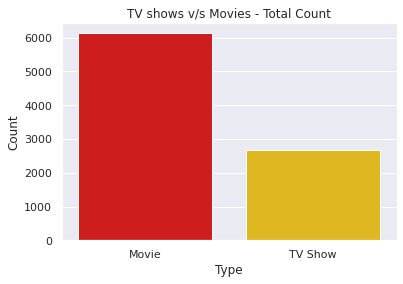

In [ ]:
#Trying a similar plot but this time using Seaborn
sns.set()
movie_tvshow = sns.countplot(x='type', data=newnetflix, palette='hot').set(title = "TV shows v/s Movies - Total Count")
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

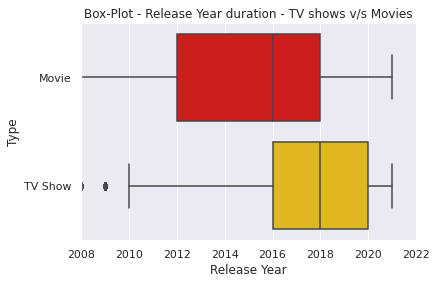

In [ ]:
sns.boxplot(data = newnetflix, x ='release_year' ,y='type', palette="hot").set(title = "Box-Plot - Release Year duration - TV shows v/s Movies")
plt.xlabel('Release Year')
plt.ylabel('Type')
plt.xlim(2008,2022)
plt.savefig('Trend_over_year.jpg')
plt.show()


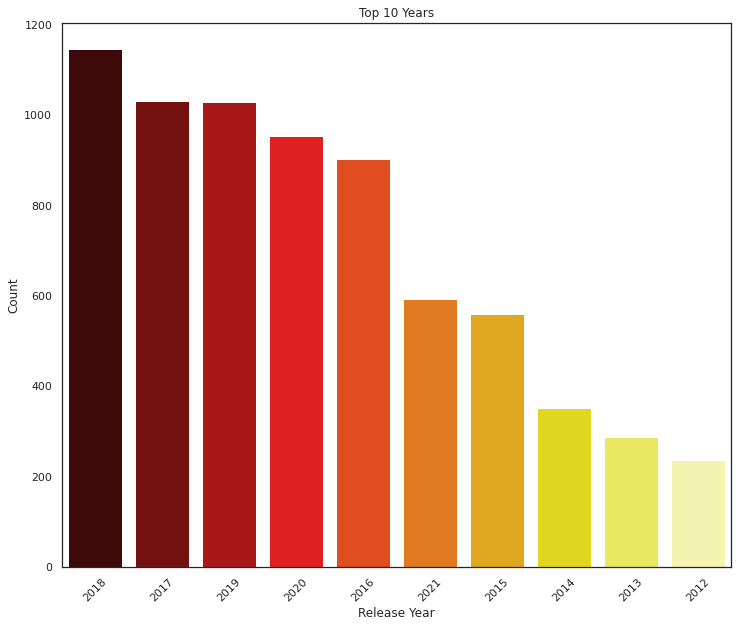

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Top 10 Years')
years =sns.countplot(x='release_year', data=newnetflix, order=newnetflix['release_year'].value_counts().index[:10], palette='hot')
years.set_xticklabels(years.get_xticklabels(), rotation=45)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


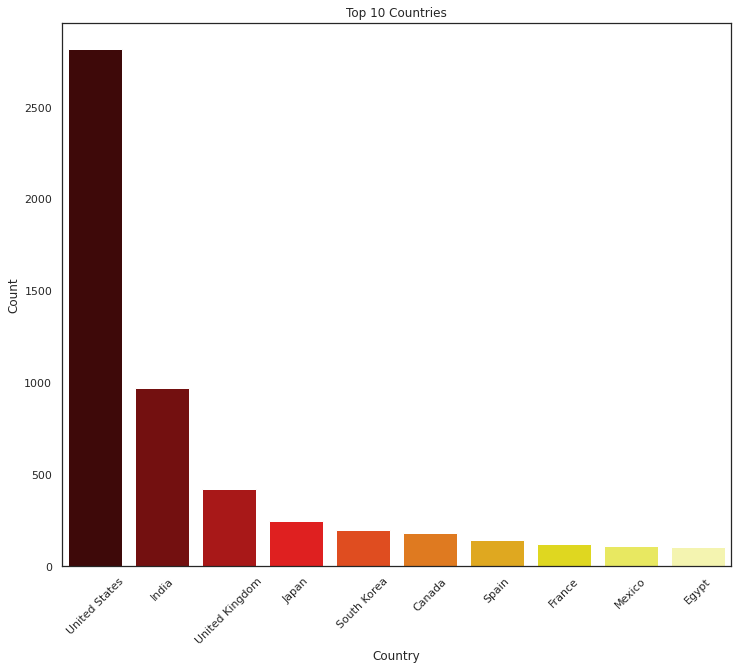

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Top 10 Countries')
years =sns.countplot(x='country', data=newnetflix, order=newnetflix['country'].value_counts().index[:10], palette='hot')
years.set_xticklabels(years.get_xticklabels(), rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()